In [0]:
#Import libraries for simulation
import tensorflow as tf
import numpy as np

#Imports for visualization
import PIL.Image
from io import BytesIO
from IPython.display import clear_output, Image, display

Simple Following of TensorFlow tutorial for solving partial differential equations , tutorial can be found here: https://www.tensorflow.org/tutorials/non-ml/pdes

In [0]:
#Code to display an array as an image

def DisplayArray(a,fmt='jpeg',rng=[0,1]):
    """display an array as a picture"""
    a = (a - rng[0])/float(rng[1] - rng[0])*255
    a = np.uint8(np.clip(a, 0, 255))
    f = BytesIO()
    PIL.Image.fromarray(a).save(f, fmt)
    clear_output(wait = True)
    display(Image(data=f.getvalue()))

In [21]:
#start interactive session

sess = tf.InteractiveSession()

#define computational convinience functions

def make_kernel(a):
    """Transform a 2D array into a convolutional kernal"""
    a = np.asarray(a)
    a = a.reshape(list(a.shape)+[1,1])
    return tf.constant(a,dtype=1)

def simple_conv(x,k):
    """a simplified 2D convolution operation"""
    x = tf.expand_dims(tf.expand_dims(x,0),-1)
    y = tf.nn.depthwise_conv2d(x, k, [1, 1, 1, 1], padding='SAME')
    return y[0,:,:,0]

def laplace(x):
    """Compute 2D laplacian of an array"""
    laplace_k = make_kernel([[0.5,1.0,0.5],[1.0,-6.,1.0],[0.5,1.0,0.5]])
    return simple_conv(x,laplace_k)


/usr/local/lib/python3.6/dist-packages/tensorflow/python/client/session.py:1735: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


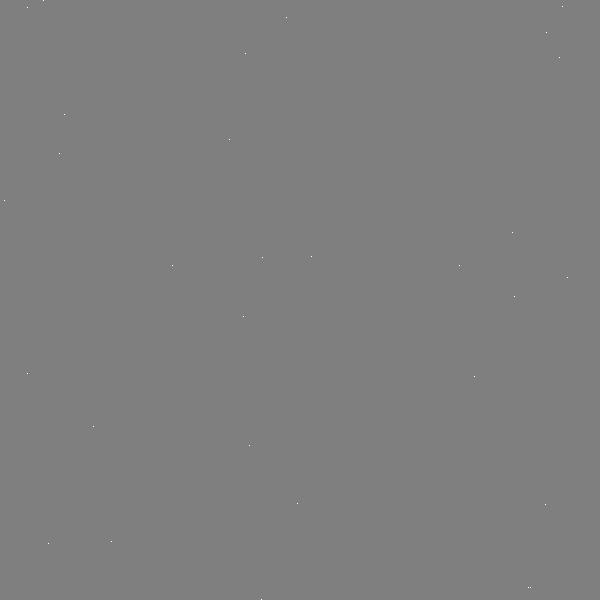

In [22]:
#Now define our PDE

N = 600

#Initial Conditions simulating some raindrops hitting a pond

#set everything to zero
u_init = np.zeros([N,N],dtype=np.float32)
ut_init = np.zeros([N,N],dtype=np.float32)

# rain hits pond agt random points

for n in range(30):
    a,b = np.random.randint(0,N,2)
    u_init[a,b] = np.random.uniform()

DisplayArray(u_init,rng=[-0.1,0.1])
    

In [0]:
#Now we define the simulation

# eps is time resolution
# damping is wave damping

eps = tf.placeholder(tf.float32,shape=())
damping = tf.placeholder(tf.float32,shape=())

#Creating variable from simulation state

U = tf.Variable(u_init)
Ut = tf.Variable(ut_init)

# discrete PDE update rules
U_ = U + eps*Ut
Ut_ = Ut+eps * (laplace(U)- damping*Ut)

#operation to update the state
step = tf.group(U.assign(U_),Ut.assign(Ut_))



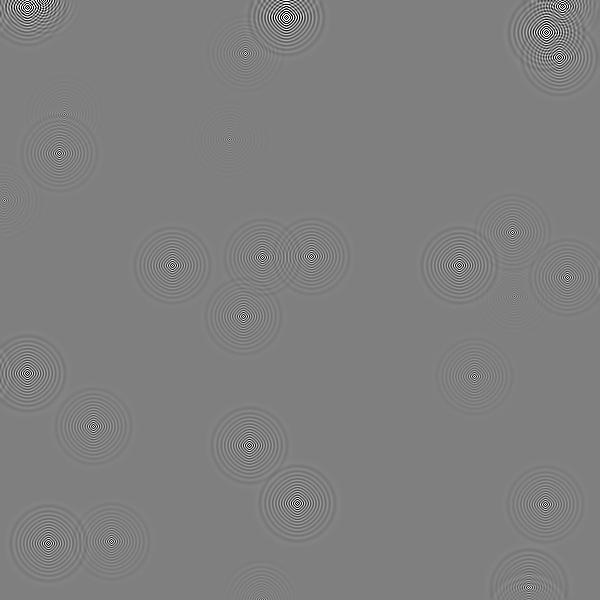

In [27]:
#Finaly we run the simulation
    
#Initialize state to initial conditions
tf.global_variables_initializer().run()

#Run PDE for 1000 steps
for i in range(1000):
    #Step simulation
    #recall eps is time resolution and damping is wave damping
    #These are being fed to placeholder tensors with a simple dictionary
    step.run({eps:0.03,damping:0.04}) 
    DisplayArray(U.eval(),rng=[-0.1,0.1])
   
sess.close()
